In [1]:
import numpy as np # for Mathematical use
import pandas as pd # for working on dataframes
import matplotlib.pyplot as plt # for Graph plotting and visualisations
import seaborn as sns # same as matplotlib
from scipy.stats import ttest_1samp
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

In [2]:
df = pd.read_excel('Project Data.xlsx',sheet_name='Table 1')
df.head()

,Years/Months,West Bengal,Odisha,Andhra Pradesh,Puducherry,Tamil Nadu,Kerala,Karnataka,Goa,Maharashtra,Gujarat,Daman and Diu
0,2014,1677,12065,20269,863,5978,25828,17910,208,13421,101521,9701
1,2015,3073,9439,8808,1547,8477,12253,17866,183,12214,88734,14665
2,2016,4887,12588,14993,1615,17103,12688,16808,144,18190,95561,22522
3,2017,12671,10502,15476,927,7075,20729,24055,332,18583,113904,15101
4,2018,7658,5929,8189,1042,10877,27499,14672,1231,15006,87186,14533


In [3]:
# Set the index as the 'Years/Months' column for better plotting
df.set_index('Years/Months', inplace=True)


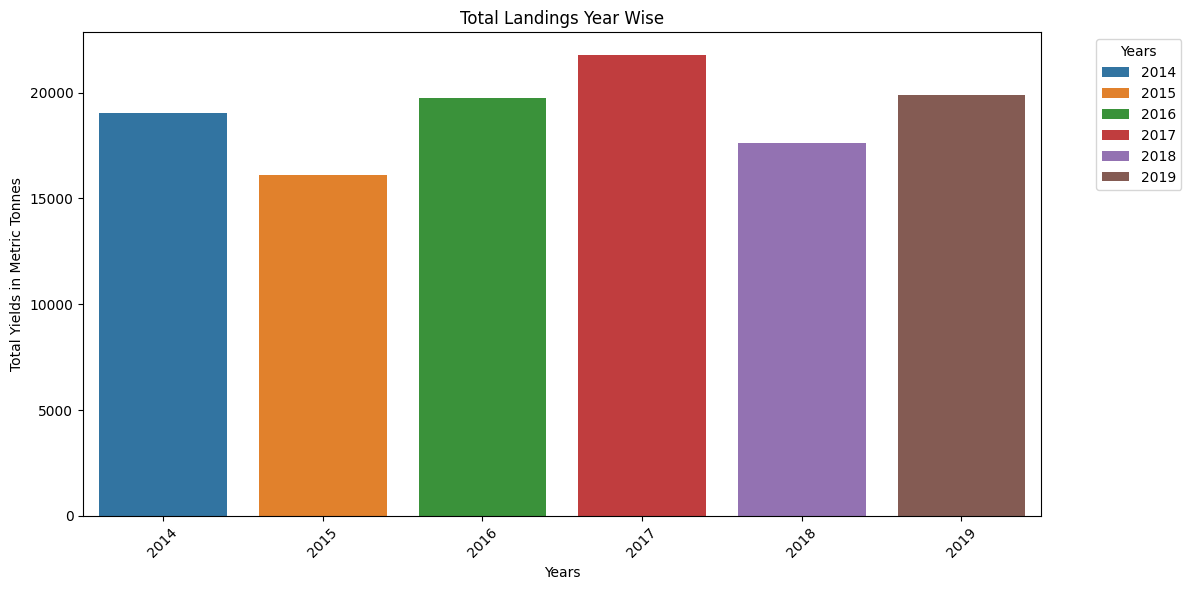

In [ ]:
# Select only the first 6 years of the dataset
df_years = df.head(6)

# Plotting the bar graph for the first 5 years without confidence intervals
plt.figure(figsize=(12, 6))
sns.barplot(data=df_years.transpose(), errorbar=None)  # Use errorbar=None 
plt.title('Total Landings Year Wise')
plt.ylabel('Total Yields in Metric Tonnes')
plt.xlabel('Years')
plt.xticks(rotation=45)
plt.legend(title='Years', labels=df_years.index, bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

# T test

T-Statistic: 0.000, P-Value: 1.000
Fail to reject the null hypothesis: No significant difference.


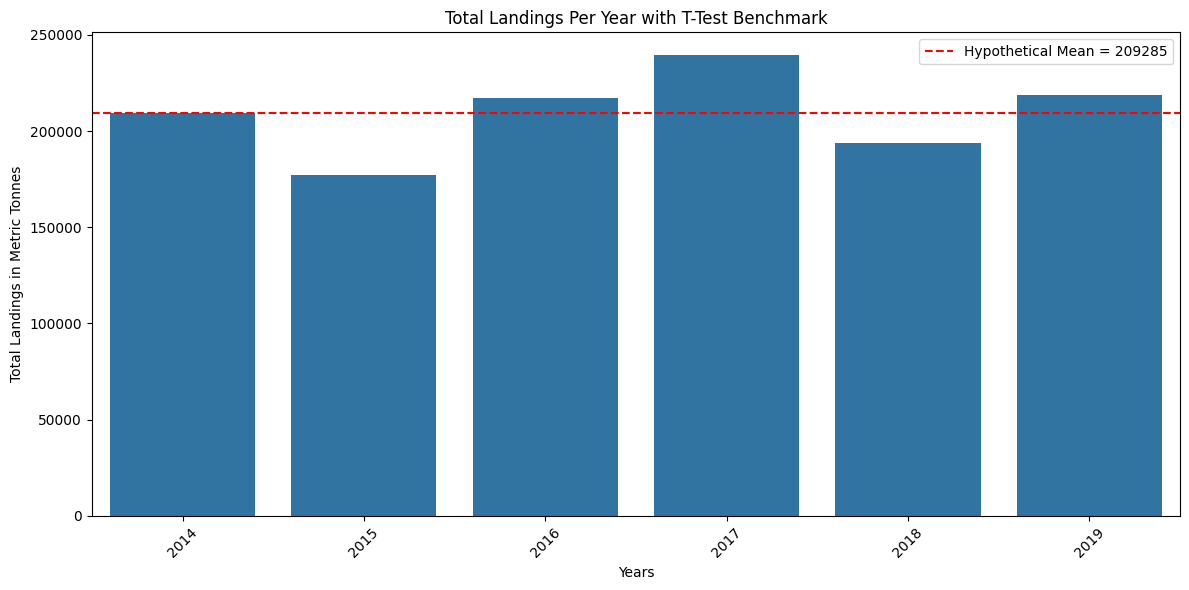

In [5]:
df['Total Landings'] = df.sum(axis=1)

df_years = df.iloc[:6].copy()
df_years['Year'] = df_years.index

# Perform one-sample t-test
hypothetical_mean = 209285
t_stat, p_value = ttest_1samp(df_years['Total Landings'], hypothetical_mean)

# Display t-test results
print(f"T-Statistic: {t_stat:.3f}, P-Value: {p_value:.3f}")
if p_value < 0.05:
    print("Reject the null hypothesis: The total landings differ significantly.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

# Plot bar chart with benchmark
plt.figure(figsize=(12, 6))
# sns.barplot(x=df_years.index, y=df_years['Total Landings'], errorbar=None)
sns.barplot(x='Year', y='Total Landings', data=df_years, errorbar=None)
plt.axhline(hypothetical_mean, color='red', linestyle='--', label=f"Hypothetical Mean = {hypothetical_mean}")
plt.title('Total Landings Per Year with T-Test Benchmark')
plt.ylabel('Total Landings in Metric Tonnes')
plt.xlabel('Years')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
df = pd.read_excel('Project Data.xlsx',sheet_name='Table 2')
# Set the index as the 'Years/Months' column for better plotting
df.set_index('Years', inplace=True)
df.head(6)

,Trawlnet,Gillnet
Years,,
2014,183586,5803
2015,156538,7637
2016,190026,9317
2017,195147,14372
2018,149766,11360
2019,185078,6583


# Chi-Square Test

Chi-Square Statistic: 5577.14
P-Value: 0.00
Degrees of Freedom: 5
Expected Frequency Table:
[[180036.5  156067.63 189498.95 199172.43 153169.2  182196.3 ]
 [  9352.5    8107.37   9844.05  10346.57   7956.8    9464.7 ]]


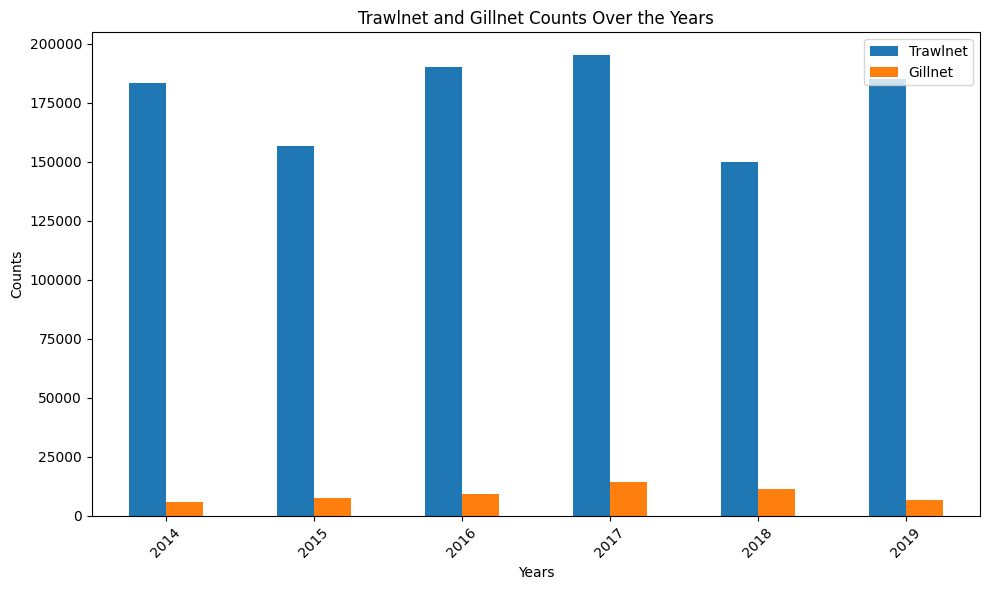

In [7]:
from scipy.stats import chi2_contingency

# Prepare the data for Chi-Square test (contingency table)
observed = df.T  # Transpose the data to get variables as columns

# Perform the Chi-Square test
chi2_stat, p_val, dof, expected = chi2_contingency(observed)

# Display the results
print(f"Chi-Square Statistic: {chi2_stat:.2f}")
print(f"P-Value: {p_val:.2f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequency Table:")
print(np.round(expected, 2))

# Graph: Bar chart for visual representation of the data
df.plot(kind='bar', figsize=(10, 6))
plt.title("Trawlnet and Gillnet Counts Over the Years")
plt.xlabel("Years")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ANOVA

ANOVA Statistic: 462.61
P-Value for ANOVA: 0.00


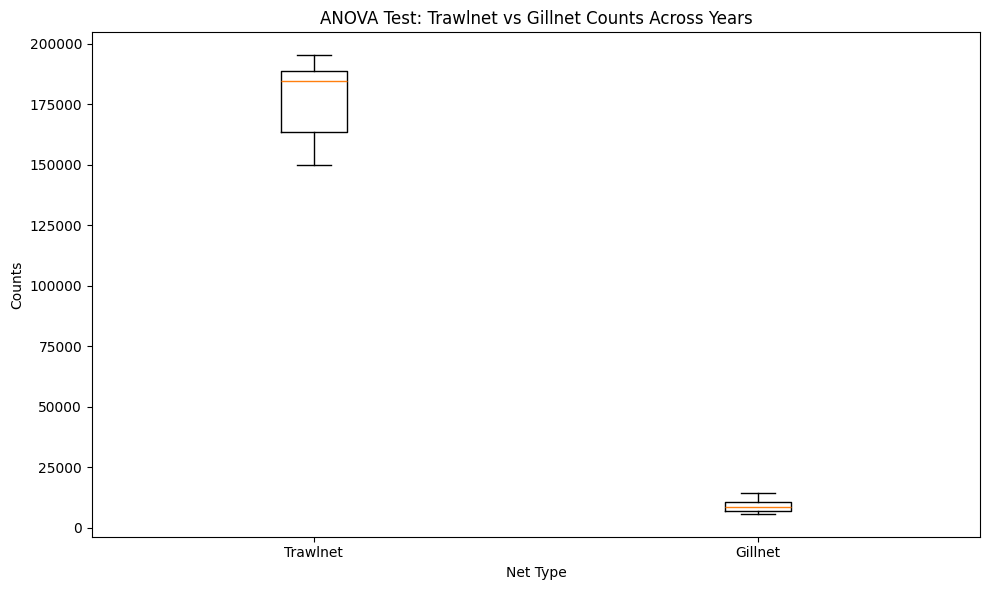

In [8]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt

# Prepare the data for ANOVA test
# Assume 'df' has data in a format where rows represent years and columns represent net types (Trawlnet, Gillnet)
# Reshape data to separate by years for ANOVA test
trawlnet_counts = df['Trawlnet']
gillnet_counts = df['Gillnet']

# Perform the ANOVA test
anova_stat, p_val_anova = f_oneway(trawlnet_counts, gillnet_counts)

# Display ANOVA results
print(f"ANOVA Statistic: {anova_stat:.2f}")
print(f"P-Value for ANOVA: {p_val_anova:.2f}")

# Graph: Box plot for ANOVA visualization
plt.figure(figsize=(10, 6))
# Updated code for boxplot with the new parameter name
plt.boxplot([trawlnet_counts, gillnet_counts], tick_labels=['Trawlnet', 'Gillnet'])
plt.title("ANOVA Test: Trawlnet vs Gillnet Counts Across Years")
plt.ylabel("Counts")
plt.xlabel("Net Type")
plt.tight_layout()
plt.show()